In [10]:
import numpy as np
import re
import mplcyberpunk
import matplotlib.pyplot as plt
from IPython.display import display, Latex
plt.style.use("cyberpunk")

Lista 2 - PRP41
------

Leonardo Antonio Lugarini

-----------------------------------------

Questão 1:
-----

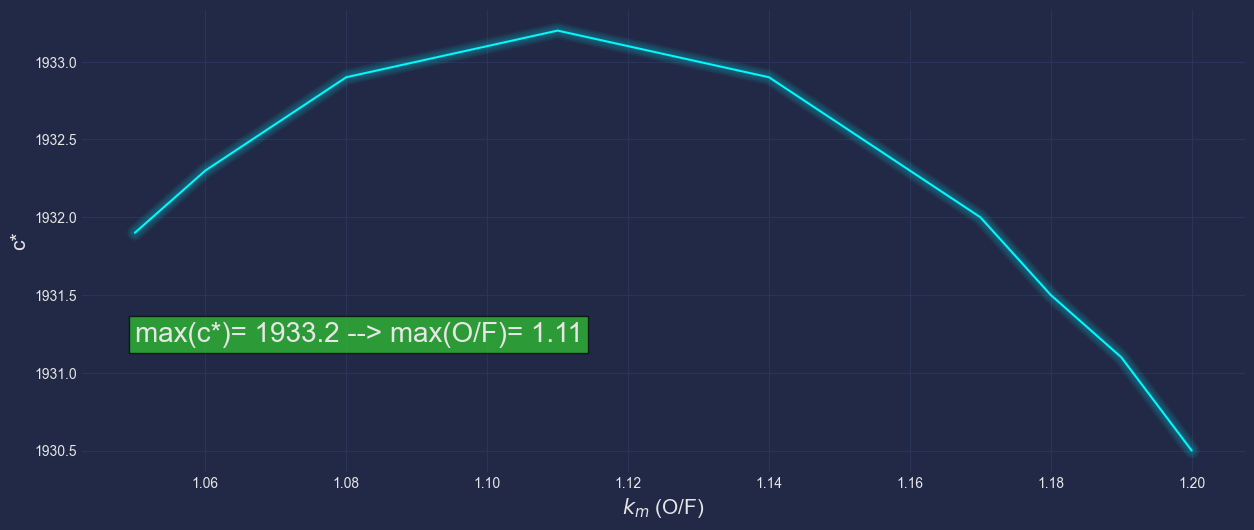

In [11]:
#a) Inputs

### CEA analysis performed on Thu 19-Oct-2023 09:05:33
  # Problem Type: "Rocket" (Infinite Area Combustor)
  
#  prob case=_______________2567 ro equilibrium
  
#  # Pressure (1 value):
#  p,bar= 50
  
#  # Oxidizer/Fuel Wt. ratio (16 values):
#  o/f= 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17
#  , 1.18, 1.19, 1.2
  
#  # You selected the following fuels and oxidizers:
#  reac
#  fuel C2H5OH(L)         wt%=100.0000
#  oxid O2(L)             wt%=100.0000

with open("output1a.html", "r") as file:
    lines = file.readlines()

of_values = []
cstar_values = []

# Regular expression patterns to match the desired lines and extract numbers
of_pattern = re.compile(r'O/F\s*=\s*([\d\.]+)')
cstar_pattern = re.compile(r'CSTAR, M/SEC\s*([\d\.]+)')

# Iterate through lines and search for matches
for line in lines:
    of_match = of_pattern.search(line)
    cstar_match = cstar_pattern.search(line)
    
    if of_match:
        of_values.append(float(of_match.group(1)))
    if cstar_match:
        cstar_values.append(float(cstar_match.group(1)))

cstar_max = max(cstar_values)
of_max = of_values[cstar_values.index(cstar_max)]

plt.plot(of_values, cstar_values)
plt.text(of_max-0.06, cstar_max-2,f'max(c*)= {cstar_max} --> max(O/F)= {of_max}', fontsize = 20,bbox=dict(facecolor='limegreen', alpha=0.7))

plt.ylabel('c*',fontsize=15)
plt.xlabel(r'$k_m$ (O/F)',fontsize=15)
plt.rcParams["figure.figsize"] = (15, 6)
mplcyberpunk.make_lines_glow()

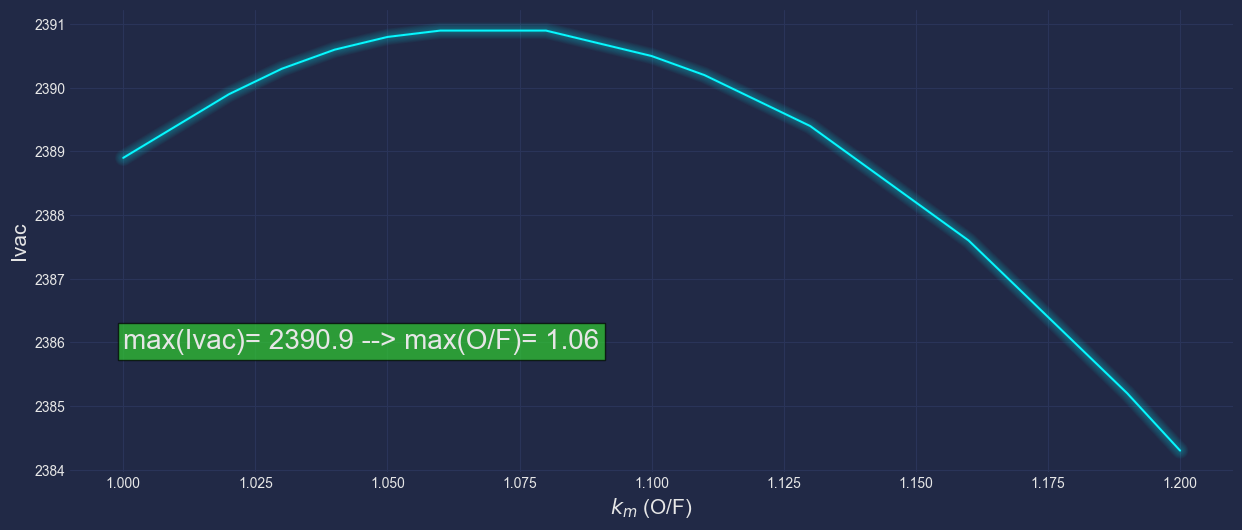

In [12]:
# #b) Inputs
### CEA analysis performed on Thu 19-Oct-2023 09:49:18
# Problem Type: "Rocket" (Infinite Area Combustor)
#  # Pressure (1 value):
#  p,bar= 50
#  # Supersonic Area Ratio (1 value):
#  supar= 200
#  # Oxidizer/Fuel Wt. ratio (21 values):
#  o/f= 1, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1
#  .13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2
#  # You selected the following fuels and oxidizers:
#  reac
#  fuel C2H5OH(L)         wt%=100.0000
#  oxid O2(L)             wt%=100.0000

with open("output1b.html", "r") as file:
    lines = file.readlines()

of_values = []
ivac_values = []

# Regular expression patterns to match the desired lines and extract numbers
of_pattern = re.compile(r'O/F\s*=\s*([\d\.]+)')
ivac_pattern = re.compile(r'Ivac, M/SEC\s*([\d\.]+)')

# Iterate through lines and search for matches
for line in lines:
    of_match = of_pattern.search(line)
    ivac_match = ivac_pattern.search(line)
    
    if of_match:
        of_values.append(float(of_match.group(1)))
    if ivac_match:
        ivac_values.append(float(ivac_match.group(1)))

ivac_max = max(ivac_values)
of_max = of_values[ivac_values.index(ivac_max)]

plt.plot(of_values, ivac_values)
plt.text(of_max-0.06, ivac_max-5,f'max(Ivac)= {ivac_max} --> max(O/F)= {of_max}', fontsize = 20,bbox=dict(facecolor='limegreen', alpha=0.7))

plt.ylabel('Ivac',fontsize=15)
plt.xlabel(r'$k_m$ (O/F)',fontsize=15)
plt.rcParams["figure.figsize"] = (15, 6)
mplcyberpunk.make_lines_glow()

c)

-> c* é uma medida da eficiência com que o propelente é queimado na câmara de combustão. Maximizar o mesmo significa que estamos otimizando a queima do propelente na câmara, independentemente das condições de expansão na saída do bocal.

-> Isp é uma medida da eficiência global do motor, levando em consideração tanto a combustão na câmara quanto a expansão do gás no bocal. A razão de expansão entre a garganta e a saída do bocal pode afetar significativamente o Isp. Uma razão de expansão maior pode permitir que os gases se expandam mais, potencialmente convertendo mais energia térmica em energia cinética e, assim, produzindo um impulso maior.

Em resumo, enquanto c* foca apenas na eficiência da combustão, o Isp leva em consideração a eficiência de todo o processo, desde a combustão até a expansão dos gases no bocal. Portanto, é possível que a razão de mistura que maximiza um não seja a mesma que maximiza o outro, especialmente quando consideramos diferentes razões de expansão no bocal.

------------------------------------

Questão 2:
-----

In [13]:
km = 1.6
#a)
def Mp_from_Mu_eps_Isp_deltaV(Mu, eps, Isp, delta_v,g0):
    c = Isp*g0
    Lambda = np.exp(delta_v/c)
    factor1 = Lambda- 1
    factor2 = (1-eps)/eps
    Mp = (factor1*Mu)/(1 - factor1*factor2)
    if Mp > 0:
        display(Latex(f"$O \ valor \ de \ M_p \ é \ igual \ a \ {Mp:.2f} \  kg$"))
    else:
       print('Não é possível atingir a velocidade necessária.')
     
    return Mp

Mu, eps, Isp, delta_v ,g0 = 500, 0.8, 300, 3000,9.81

Mp = Mp_from_Mu_eps_Isp_deltaV(Mu, eps, Isp, delta_v, g0)

<IPython.core.display.Latex object>

In [14]:
#b)
fuel_mass = Mp/(1+km)
oxi_mass = km*fuel_mass

r = 0.5 #raio
base_area = np.pi*r**2
volume_sphere = (4/3)*np.pi*r**3
oxi_rho = 1144
fuel_rho = 790

oxi_volume = oxi_mass/oxi_rho
fuel_volume = fuel_mass/fuel_rho

oxi_height = (oxi_volume - volume_sphere)/base_area
fuel_height = (fuel_volume - volume_sphere)/base_area

print(f'Massa Combustivel: {fuel_mass:.2f} kg; Massa Oxidante: {oxi_mass:.2f} kg')
print(f'Altura Tanque Combustível: {fuel_height:.2f} m; Altura Tanque Oxidante: {oxi_height:.2f} m')

Massa Combustivel: 611.45 kg; Massa Oxidante: 978.32 kg
Altura Tanque Combustível: 0.32 m; Altura Tanque Oxidante: 0.42 m


In [15]:
#c)

p_p = 70 #bar
gamma_He = 1.667
M_He = 4 #g/mol
R_He = (8314.462618/M_He) #J/(kg.K)
T_0 = 300 #K
p_0 = 200 #bar
f_s = 1.5
sigma_Al = 0.214 #GPa
rho_Al = 2800 #kg/m3
sigma_Ti = 1.23 #GPa
rho_Ti = 4460 #kg/m3

#massa tanques propelentes
A_e = 4*np.pi*r**2
x_e = f_s*p_p*r/(2*sigma_Al*10000)

A_c_oxi = 2*np.pi*r*oxi_height
A_c_fuel = 2*np.pi*r*fuel_height
x_c = f_s*p_p*r/(sigma_Al*10000)

M_T_oxi = rho_Al*(A_e*x_e + A_c_oxi*x_c)
M_T_fuel = rho_Al*(A_e*x_e + A_c_fuel*x_c)

#tanque pressurizante

#máximo que M0 pode ser
M_0_oxi = ((p_p*100000*oxi_volume)/(R_He*T_0))*(gamma_He/(1 - (p_p/p_0)))
M_0_fuel = ((p_p*100000*fuel_volume)/(R_He*T_0))*(gamma_He/(1 - (p_p/p_0)))

r_oxi = ((3*M_0_oxi*R_He*T_0)/(4*np.pi*p_0*100000))**(1/3)
r_fuel = ((3*M_0_fuel*R_He*T_0)/(4*np.pi*p_0*100000))**(1/3)

M_T_He_oxi = 4*np.pi*(r_oxi**2)*rho_Ti*(f_s*p_0*r_oxi/(2*sigma_Ti*10000))
M_T_He_fuel = 4*np.pi*(r_fuel**2)*rho_Ti*(f_s*p_0*r_fuel/(2*sigma_Ti*10000))

print(f'Oxidante ==> Massa Tanque Propelente: {M_T_oxi:.2f} kg; Massa Gás Hélio: {M_0_oxi:.2f} kg; Massa Tanque Pressurizante: {M_T_He_oxi:.2f} kg')
print(f'Combustível ==> Massa Tanque Propelente: {M_T_fuel:.2f} kg; Massa Gás Hélio: {M_0_fuel:.2f} kg; Massa Tanque Pressurizante: {M_T_He_fuel:.2f} kg')

Oxidante ==> Massa Tanque Propelente: 199.01 kg; Massa Gás Hélio: 24.62 kg; Massa Tanque Pressurizante: 125.25 kg
Combustível ==> Massa Tanque Propelente: 176.70 kg; Massa Gás Hélio: 22.28 kg; Massa Tanque Pressurizante: 113.36 kg


In [16]:
#d)
#eps = (Mp)/(Mp + Me)
Mp = fuel_mass + oxi_mass + M_0_oxi + M_0_fuel
Me = M_T_oxi + M_T_fuel + M_T_He_oxi + M_T_He_fuel
eps_d = Mp/(Mp + Me)

print(f'Eficiência estrutural recalculada: {eps_d:.2%}; Eficiência inicialmente considerada: {eps:.2%}')

Eficiência estrutural recalculada: 72.71%; Eficiência inicialmente considerada: 80.00%


In [17]:
#e)
p_p = 5 #bar
#massa tanques propelentes
A_e = 4*np.pi*r**2
x_e = f_s*p_p*r/(2*sigma_Al*10000)

A_c_oxi = 2*np.pi*r*oxi_height
A_c_fuel = 2*np.pi*r*fuel_height
x_c = f_s*p_p*r/(sigma_Al*10000)

M_T_oxi = rho_Al*(A_e*x_e + A_c_oxi*x_c)
M_T_fuel = rho_Al*(A_e*x_e + A_c_fuel*x_c)

#tanque pressurizante

#máximo que M0 pode ser
M_0_oxi = ((p_p*100000*oxi_volume)/(R_He*T_0))*(gamma_He/(1 - (p_p/p_0)))
M_0_fuel = ((p_p*100000*fuel_volume)/(R_He*T_0))*(gamma_He/(1 - (p_p/p_0)))

r_oxi = ((3*M_0_oxi*R_He*T_0)/(4*np.pi*p_0*100000))**(1/3)
r_fuel = ((3*M_0_fuel*R_He*T_0)/(4*np.pi*p_0*100000))**(1/3)

M_T_He_oxi = 4*np.pi*(r_oxi**2)*rho_Ti*(f_s*p_0*r_oxi/(2*sigma_Ti*10000))
M_T_He_fuel = 4*np.pi*(r_fuel**2)*rho_Ti*(f_s*p_0*r_fuel/(2*sigma_Ti*10000))

print(f'Oxidante ==> Massa Tanque Propelente: {M_T_oxi:.2f} kg; Massa Gás Hélio: {M_0_oxi:.2f} kg; Massa Tanque Pressurizante: {M_T_He_oxi:.2f} kg')
print(f'Combustível ==> Massa Tanque Propelente: {M_T_fuel:.2f} kg; Massa Gás Hélio: {M_0_fuel:.2f} kg; Massa Tanque Pressurizante: {M_T_He_fuel:.2f} kg')

Oxidante ==> Massa Tanque Propelente: 14.21 kg; Massa Gás Hélio: 1.17 kg; Massa Tanque Pressurizante: 5.96 kg
Combustível ==> Massa Tanque Propelente: 12.62 kg; Massa Gás Hélio: 1.06 kg; Massa Tanque Pressurizante: 5.40 kg


In [18]:
#f)

Mp = fuel_mass + oxi_mass + M_0_oxi + M_0_fuel
Me = M_T_oxi + M_T_fuel + M_T_He_oxi + M_T_He_fuel
eps_f = Mp/(Mp + Me)

print(f'Eficiência estrutural recalculada: {eps_f:.2%}; Eficiência inicialmente considerada: {eps:.2%}')

Eficiência estrutural recalculada: 97.66%; Eficiência inicialmente considerada: 80.00%


Questão 3:
-----

Deduziremos a massa do tanque inicial (M_T) em função de M:

$$
M_T = 4 \pi r^2 \rho x, \text{ } x = \frac{f_s p_0 r}{2 \sigma}
$$

$$
M_T = \frac{2 \pi r^3 \rho f_s p_0}{\sigma}
$$

Sendo o valor de r definido em função de M:

$$
 r = (\frac{3 M R T}{4 \pi p_0})^{\frac{1}{3}} 
$$

Portanto:

$$
    M_T = \frac{3 M R T}{4 \pi p_0} \frac{2 \pi \rho f_s p_0}{\sigma}
$$

$$
    M_T = \frac{3 M R T \rho f_s }{2 \sigma}  
$$

Considerando agora um tanque idêntico ao inicial, com mesma densidade e tensão superficial. Para um mesmo gás com temperatura igual ao inicial e massa 'n' vezes menor:

$$
    m_T = \frac{3 m R T \rho f_s }{2 \sigma}, \text{ } m = \frac{M}{n}
$$

Fazendo a somatória das massas dos tanques menores:

$$
    \sum_{i = 1}^{n} {m_T}_i= \sum_{i = 1}^{n} \frac{3 m_i R T \rho f_s }{2 \sigma}
$$

Tirando os valores constantes da soma:

$$
    \sum_{i = 1}^{n} {m_T}_i=  \frac{3  R T \rho f_s }{2 \sigma} \sum_{i = 1}^{n} m_i
$$

Como m_i tem sempre o mesmo valor:

$$
    \sum_{i = 1}^{n} {m_T}_i=  \frac{3 R T \rho f_s }{2 \sigma} \sum_{i = 1}^{n} \frac{M}{n}
$$

$$
    \sum_{i = 1}^{n} {m_T}_i=  \frac{3 M R T \rho f_s }{2 \sigma} \frac{1}{n} \sum_{i = 1}^{n} 1
$$

$$
    \sum_{i = 1}^{n} {m_T}_i=  \frac{3 M R T \rho f_s }{2 \sigma} \frac{1}{n} n
$$

$$
    \sum_{i = 1}^{n} {m_T}_i=  \frac{3 M R T \rho f_s }{2 \sigma} = M_T \text{, } \text{ c. q. d.}
$$